**Neural Network (Gradient Descent)**

In [2]:
import numpy as np
from six.moves import xrange 
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
y = np.array([[0,1,1,0]]).T
print(X)
print(y)
alpha,hidden_dim = (0.5,4)
synapse_0 = 2*np.random.random((3,hidden_dim)) - 1
synapse_1 = 2*np.random.random((hidden_dim,1)) - 1
for j in xrange(60000):
    layer_1 = 1/(1+np.exp(-(np.dot(X,synapse_0))))
    layer_2 = 1/(1+np.exp(-(np.dot(layer_1,synapse_1))))
    layer_2_delta = (layer_2 - y)*(layer_2*(1-layer_2))
    layer_1_delta = layer_2_delta.dot(synapse_1.T) * (layer_1 * (1-layer_1))
    synapse_1 -= (alpha * layer_1.T.dot(layer_2_delta))
    synapse_0 -= (alpha * X.T.dot(layer_1_delta))

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
[[0]
 [1]
 [1]
 [0]]


Gradient Descent
Aşağıdaki resimdeki gibi yuvarlak bir kovanın içinde kırmızı bir topunuz olduğunu hayal edin. Ayrıca kırmızı topun kovanın dibini bulmaya çalıştığını hayal edin. Bu optimizasyon. Bizim durumumuzda, top, kovadaki en alt noktayı bulmak için konumunu (soldan sağa) optimize ediyor.

Peki, top en alt noktayı bulmak için konumunu ayarlamak için hangi bilgileri kullanır? Sahip olduğu tek bilgi, aşağıda mavi çizgiyle gösterilen mevcut konumunda kepçenin yan tarafının eğimidir. Eğim negatif olduğunda (soldan sağa doğru), topun sağa hareket etmesi gerektiğine dikkat edin. Ancak eğim pozitif olduğunda top sola hareket etmelidir. Gördüğünüz gibi, bu, birkaç yinelemede kovanın dibini bulmak için fazlasıyla yeterli bilgidir. Bu, gradyan optimizasyonu adı verilen bir optimizasyon alt alanıdır.


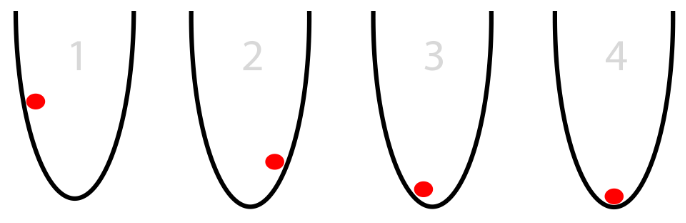

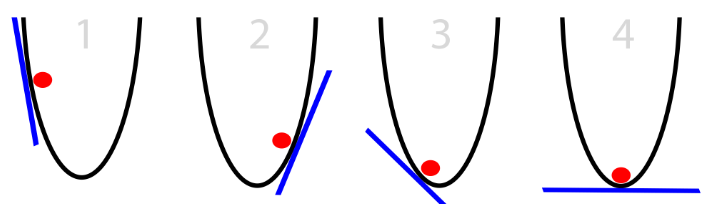



2 Layer Neural Network

In [4]:
import numpy as np

# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)
    
# input dataset
X = np.array([  [0,1],
                [0,1],
                [1,0],
                [1,0] ])
    
# output dataset            
y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
synapse_0 = 2*np.random.random((2,1)) - 1

for iter in xrange(10000):

    # forward propagation
    layer_0 = X
    layer_1 = sigmoid(np.dot(layer_0,synapse_0))

    # how much did we miss?
    layer_1_error = layer_1 - y

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)
    synapse_0_derivative = np.dot(layer_0.T,layer_1_delta)

    # update weights
    synapse_0 -= synapse_0_derivative

print("Output After Training:")
print(layer_1)




Output After Training:
[[0.00505119]
 [0.00505119]
 [0.99494905]
 [0.99494905]]


In [5]:
import numpy as np

alphas = [0.001,0.01,0.1,1,10,100,1000]

# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)
    
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
                
y = np.array([[0],
			[1],
			[1],
			[0]])

for alpha in alphas:
    print("\nTraining With Alpha:" + str(alpha))
    np.random.seed(1)

    # randomly initialize our weights with mean 0
    synapse_0 = 2*np.random.random((3,4)) - 1
    synapse_1 = 2*np.random.random((4,1)) - 1

    for j in xrange(60000):

        # Feed forward through layers 0, 1, and 2
        layer_0 = X
        layer_1 = sigmoid(np.dot(layer_0,synapse_0))
        layer_2 = sigmoid(np.dot(layer_1,synapse_1))

        # how much did we miss the target value?
        layer_2_error = layer_2 - y

        if (j% 10000) == 0:
            print("Error after "+str(j)+" iterations:" + str(np.mean(np.abs(layer_2_error))))

        # in what direction is the target value?
        # were we really sure? if so, don't change too much.
        layer_2_delta = layer_2_error*sigmoid_output_to_derivative(layer_2)

        # how much did each l1 value contribute to the l2 error (according to the weights)?
        layer_1_error = layer_2_delta.dot(synapse_1.T)

        # in what direction is the target l1?
        # were we really sure? if so, don't change too much.
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)

        synapse_1 -= alpha * (layer_1.T.dot(layer_2_delta))
        synapse_0 -= alpha * (layer_0.T.dot(layer_1_delta))




Training With Alpha:0.001
Error after 0 iterations:0.4964100319027255
Error after 10000 iterations:0.49516402549338606
Error after 20000 iterations:0.4935960431880486
Error after 30000 iterations:0.4916063585594306
Error after 40000 iterations:0.48910016654420474
Error after 50000 iterations:0.4859778578461583

Training With Alpha:0.01
Error after 0 iterations:0.4964100319027255
Error after 10000 iterations:0.45743107444190134
Error after 20000 iterations:0.359097202563399
Error after 30000 iterations:0.23935813715897256
Error after 40000 iterations:0.14307065901337032
Error after 50000 iterations:0.09859642980892716

Training With Alpha:0.1
Error after 0 iterations:0.4964100319027255
Error after 10000 iterations:0.042888017000115825
Error after 20000 iterations:0.024098994228521613
Error after 30000 iterations:0.018110652146797846
Error after 40000 iterations:0.014987616272210912
Error after 50000 iterations:0.013014490538142586

Training With Alpha:1
Error after 0 iterations:0.49641

In [6]:
import numpy as np

alphas = [0.001,0.01,0.1,1,10,100,1000]

# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)
    
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
                
y = np.array([[0],
			[1],
			[1],
			[0]])



for alpha in alphas:
    print("\nTraining With Alpha:" + str(alpha))
    np.random.seed(1)

    # randomly initialize our weights with mean 0
    synapse_0 = 2*np.random.random((3,4)) - 1
    synapse_1 = 2*np.random.random((4,1)) - 1
        
    prev_synapse_0_weight_update = np.zeros_like(synapse_0)
    prev_synapse_1_weight_update = np.zeros_like(synapse_1)

    synapse_0_direction_count = np.zeros_like(synapse_0)
    synapse_1_direction_count = np.zeros_like(synapse_1)
        
    for j in xrange(60000):

        # Feed forward through layers 0, 1, and 2
        layer_0 = X
        layer_1 = sigmoid(np.dot(layer_0,synapse_0))
        layer_2 = sigmoid(np.dot(layer_1,synapse_1))

        # how much did we miss the target value?
        layer_2_error = y - layer_2

        if (j% 10000) == 0:
            print("Error:" + str(np.mean(np.abs(layer_2_error))))

        # in what direction is the target value?
        # were we really sure? if so, don't change too much.
        layer_2_delta = layer_2_error*sigmoid_output_to_derivative(layer_2)

        # how much did each l1 value contribute to the l2 error (according to the weights)?
        layer_1_error = layer_2_delta.dot(synapse_1.T)

        # in what direction is the target l1?
        # were we really sure? if so, don't change too much.
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)
        
        synapse_1_weight_update = (layer_1.T.dot(layer_2_delta))
        synapse_0_weight_update = (layer_0.T.dot(layer_1_delta))
        
        if(j > 0):
            synapse_0_direction_count += np.abs(((synapse_0_weight_update > 0)+0) - ((prev_synapse_0_weight_update > 0) + 0))
            synapse_1_direction_count += np.abs(((synapse_1_weight_update > 0)+0) - ((prev_synapse_1_weight_update > 0) + 0))        
        
        synapse_1 += alpha * synapse_1_weight_update
        synapse_0 += alpha * synapse_0_weight_update
        
        prev_synapse_0_weight_update = synapse_0_weight_update
        prev_synapse_1_weight_update = synapse_1_weight_update
    
    print("Synapse 0")
    print(synapse_0)
    
    print("Synapse 0 Update Direction Changes")
    print(synapse_0_direction_count)
    
    print("Synapse 1")
    print(synapse_1)

    print("Synapse 1 Update Direction Changes")
    print(synapse_1_direction_count)


Training With Alpha:0.001
Error:0.4964100319027255
Error:0.49516402549338606
Error:0.4935960431880486
Error:0.4916063585594306
Error:0.48910016654420474
Error:0.4859778578461583
Synapse 0
[[-0.28448441  0.32471214 -1.53496167 -0.47594822]
 [-0.7550616  -1.04593014 -1.45446052 -0.32606771]
 [-0.2594825  -0.13487028 -0.29722666  0.40028038]]
Synapse 0 Update Direction Changes
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]]
Synapse 1
[[-0.61957526]
 [ 0.76414675]
 [-1.49797046]
 [ 0.40734574]]
Synapse 1 Update Direction Changes
[[1.]
 [1.]
 [0.]
 [1.]]

Training With Alpha:0.01
Error:0.4964100319027255
Error:0.45743107444190134
Error:0.359097202563399
Error:0.23935813715897256
Error:0.14307065901337032
Error:0.09859642980892716
Synapse 0
[[ 2.39225985  2.56885428 -5.38289334 -3.29231397]
 [-0.35379718 -4.6509363  -5.67005693 -1.74287864]
 [-0.15431323 -1.17147894  1.97979367  3.44633281]]
Synapse 0 Update Direction Changes
[[1. 1. 0. 0.]
 [2. 0. 0. 2.]
 [4. 2. 1. 1.]]
Synapse 1
[[-3.700450

In [7]:
import numpy as np

alphas = [0.001,0.01,0.1,1,10,100,1000]
hiddenSize = 32

# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)
    
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
                
y = np.array([[0],
			[1],
			[1],
			[0]])

for alpha in alphas:
    print("\nTraining With Alpha:" + str(alpha))
    np.random.seed(1)

    # randomly initialize our weights with mean 0
    synapse_0 = 2*np.random.random((3,hiddenSize)) - 1
    synapse_1 = 2*np.random.random((hiddenSize,1)) - 1

    for j in xrange(60000):

        # Feed forward through layers 0, 1, and 2
        layer_0 = X
        layer_1 = sigmoid(np.dot(layer_0,synapse_0))
        layer_2 = sigmoid(np.dot(layer_1,synapse_1))

        # how much did we miss the target value?
        layer_2_error = layer_2 - y

        if (j% 10000) == 0:
            print("Error after "+str(j)+" iterations:" + str(np.mean(np.abs(layer_2_error))))

        # in what direction is the target value?
        # were we really sure? if so, don't change too much.
        layer_2_delta = layer_2_error*sigmoid_output_to_derivative(layer_2)

        # how much did each l1 value contribute to the l2 error (according to the weights)?
        layer_1_error = layer_2_delta.dot(synapse_1.T)

        # in what direction is the target l1?
        # were we really sure? if so, don't change too much.
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)

        synapse_1 -= alpha * (layer_1.T.dot(layer_2_delta))
        synapse_0 -= alpha * (layer_0.T.dot(layer_1_delta))



Training With Alpha:0.001
Error after 0 iterations:0.49643992250078794
Error after 10000 iterations:0.49104946812904954
Error after 20000 iterations:0.48497630702745953
Error after 30000 iterations:0.4778306787926556
Error after 40000 iterations:0.46903846539028254
Error after 50000 iterations:0.458029258565275

Training With Alpha:0.01
Error after 0 iterations:0.49643992250078794
Error after 10000 iterations:0.3563790616480213
Error after 20000 iterations:0.14693984546475994
Error after 30000 iterations:0.08801561274158765
Error after 40000 iterations:0.06514781927504919
Error after 50000 iterations:0.052965808702569714

Training With Alpha:0.1
Error after 0 iterations:0.49643992250078794
Error after 10000 iterations:0.03054049083855505
Error after 20000 iterations:0.019063872533418433
Error after 30000 iterations:0.014764390729581694
Error after 40000 iterations:0.012389242990471293
Error after 50000 iterations:0.010842166973777443

Training With Alpha:1
Error after 0 iterations:0.4